Tujuan: Meningkatkan strategi pemasaran dan memahami pola pembelian pelanggan.

Tugas:
*   Analisis pola pembelian berdasarkan waktu, kategori produk, atau wilayah.
*   Identifikasi pelanggan yang kemungkinan besar akan membeli kembali (retensi pelanggan).
*   Visualisasikan tren penjualan menggunakan dashboard (Tableau/Power BI).


In [2]:
import json

with open(r"C:\Users\aryag\Documents\Code\Ecommers_analysis\kaggle (2).json") as f:
    data = json.load(f)

print(data)

{'username': 'aryagunaabirafdiyasa', 'key': 'f2e01ea5650c85eaf68a578dec47bb07'}


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download -d thedevastator/unlock-profits-with-e-commerce-sales-data

Dataset URL: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data
License(s): other
unlock-profits-with-e-commerce-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

with zipfile.ZipFile("unlock-profits-with-e-commerce-sales-data.zip", 'r') as zip_ref:
    zip_ref.extractall("ecommerce_sales_data")

In [6]:
import os

os.listdir("ecommerce_sales_data")


['Amazon Sale Report.csv',
 'Cloud Warehouse Compersion Chart.csv',
 'Expense IIGF.csv',
 'International sale Report.csv',
 'May-2022.csv',
 'P  L March 2021.csv',
 'Sale Report.csv']

In [7]:
import pandas as pd

data = pd.read_csv("ecommerce_sales_data/Amazon Sale Report.csv", low_memory=False)
print(data.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# convert date menjadi datatime
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', errors='coerce')

# Periksa nilai yang gagal dikonversi
print(data['Date'].isna().sum())

0


In [10]:
data['day'] = data['Date'].dt.day_name()
# calculate the number of trasactions per day
daily_sales = data['day'].value_counts()

C:\Users\aryag\AppData\Local\Temp\ipykernel_15952\4225096624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')


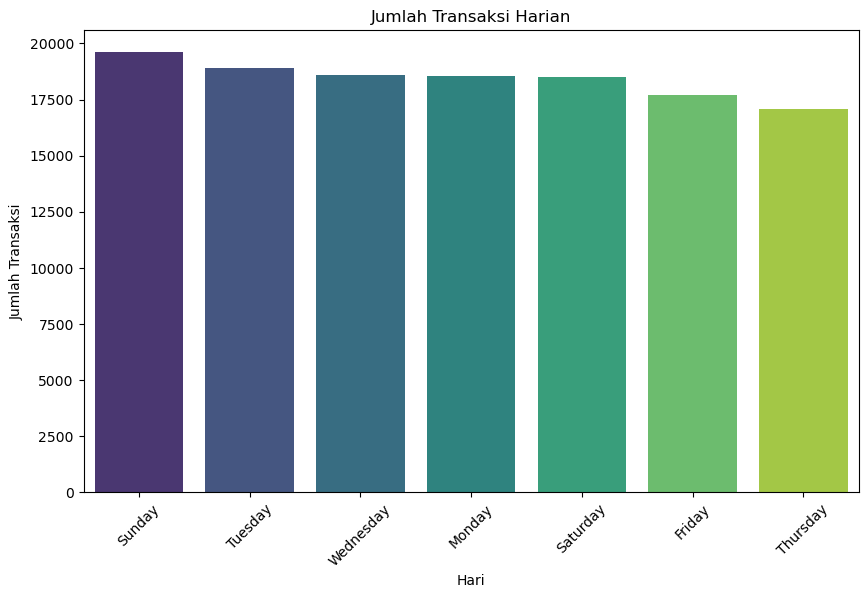

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.title('Jumlah Transaksi Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

pada tampilan diatas menggambarkan berapa banyak transaksi yang di lakukan setiap harinya dimana dapat di ambil kesimpulan bahwa pada hari minggu memiliki transaksi terbanyak lalu pada kamis memiliki transaksi terendah

C:\Users\aryag\AppData\Local\Temp\ipykernel_15952\2024067831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')


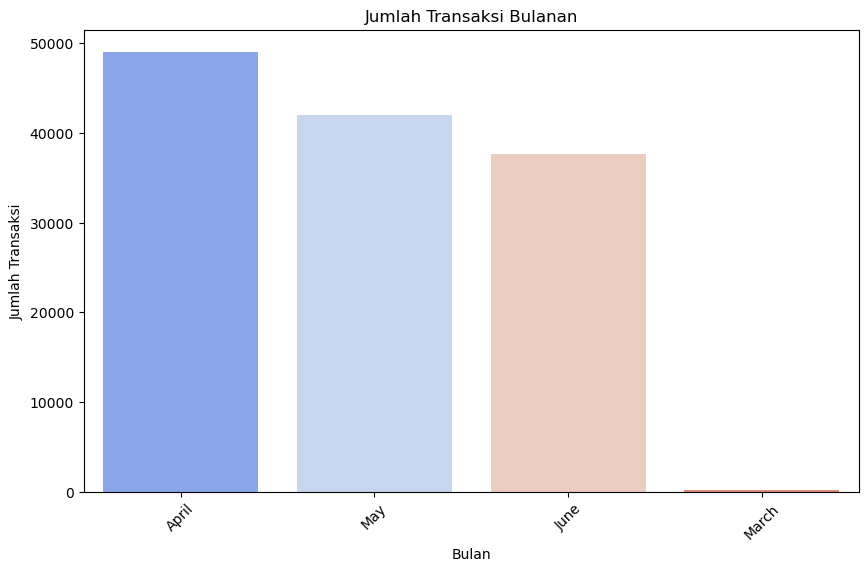

In [13]:
data['Month'] = data['Date'].dt.month_name()
# Hitung jumlah transaksi per bulan
monthly_sales = data['Month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Jumlah Transaksi Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


tampilan diatas adalah tampilan 4 bulan data transaksi dilakukan dari tampilan yang di dapatkan bahwa pada bulan april memilii traksaksi terbanyak dan maret memiliki traksaksi terendah

C:\Users\aryag\AppData\Local\Temp\ipykernel_15952\2427685746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='pastel')


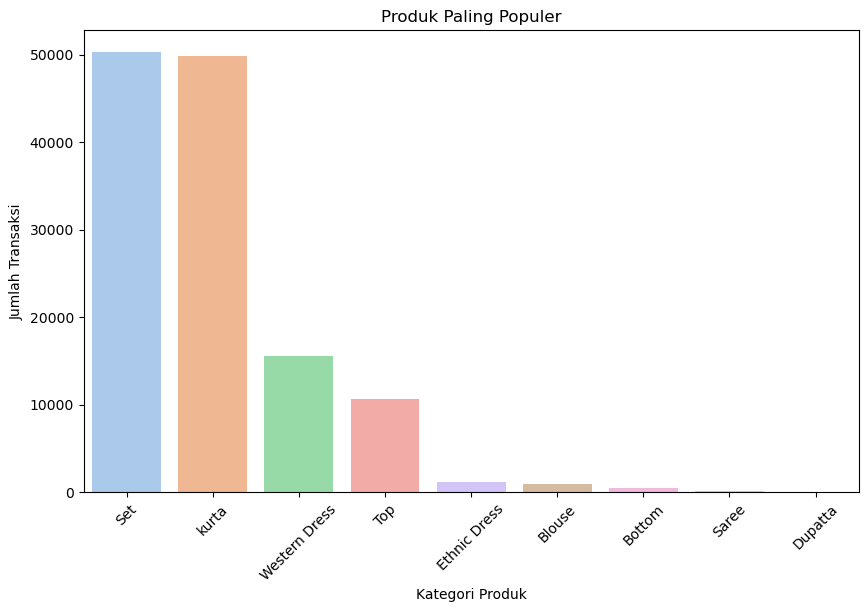

In [15]:
# Hitung jumlah transaksi berdasarkan kategori produk
category_sales = data['Category'].value_counts()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='pastel')
plt.title('Produk Paling Populer')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


tampilan di atas merupakan kategori barang yang paling sering di cek out yaitu set dan yang paling jarang adalah duspatta

C:\Users\aryag\AppData\Local\Temp\ipykernel_15952\992296912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='Set2')


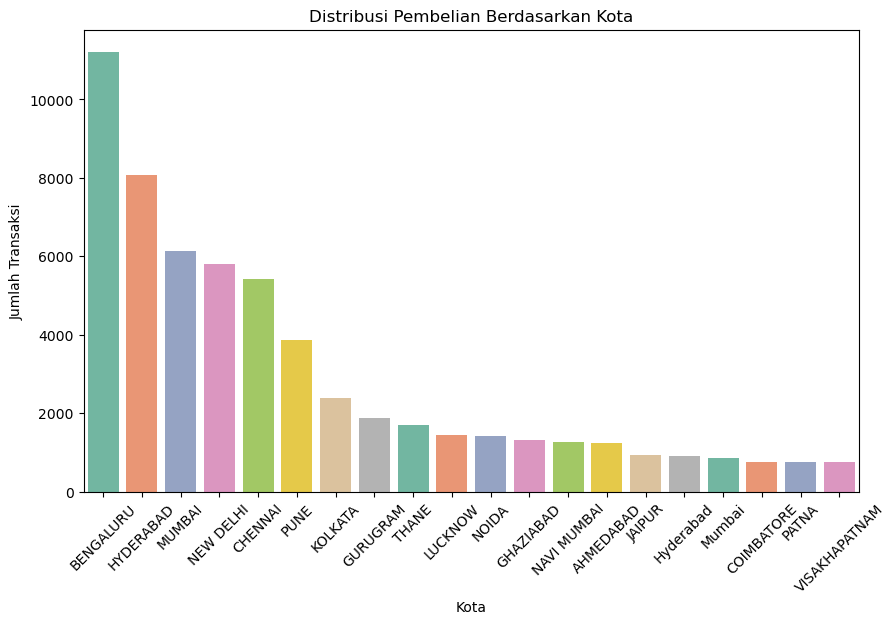

In [17]:
# Hitung jumlah transaksi berdasarkan kota
city_sales = data['ship-city'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='Set2')
plt.title('Distribusi Pembelian Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


tampilan diatas adalah tampilan kategori kota yang paling sering melakukan traksaksi 20 kota yang di tampilkan menggambarkan bahwa kota bengaluru menjadi kota yang paling sering melakukan transaksi dan kota visakhapatanam menjadi kota terendah yang melakukan transaksi selama 4 bulan terakhir


C:\Users\aryag\AppData\Local\Temp\ipykernel_15952\315064383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='Set3')


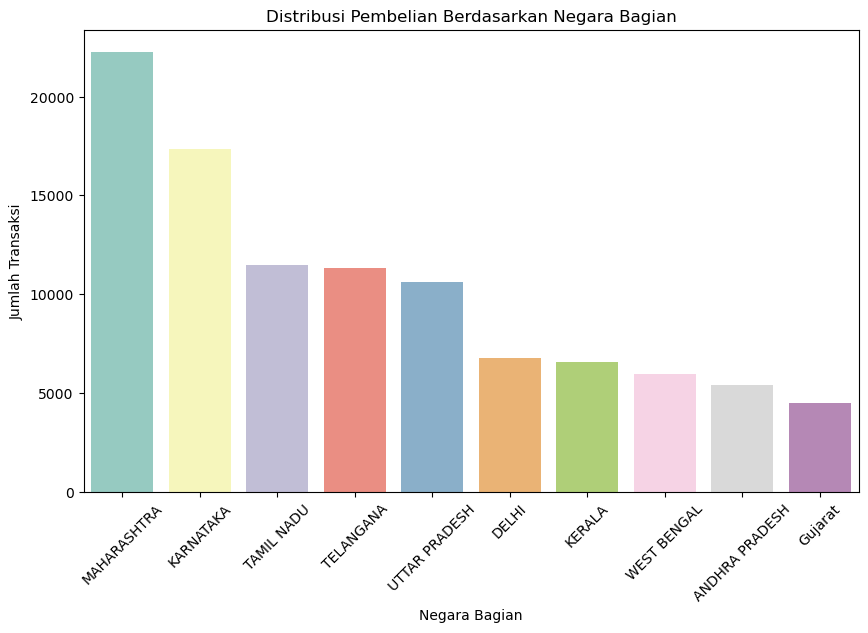

In [19]:
# Hitung jumlah transaksi berdasarkan negara bagian
state_sales = data['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='Set3')
plt.title('Distribusi Pembelian Berdasarkan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()


tampilan di atas merupakan kumpulan negara bagian yang paling melakukan transaksi dimana negara bagian maharashtra menjadi posisi negara bagian yang paling sering melakukan transaksi dan gujarat menjadi terendah nya


In [21]:
# Atur format tampilan angka menjadi 2 desimal
pd.options.display.float_format = '{:.2f}%'.format

# Total transaksi per bulan
total_sales = data.shape[0]

# Total transaksi per bulan
monthly_sales = data.groupby('Month').size()

# Hitung rata-rata transaksi per bulan dalam persentase terhadap total transaksi
monthly_sales_percentage = (monthly_sales / total_sales) * 100

# Hitung jumlah transaksi per bulan dan kategori
category_monthly_avg = data.groupby(['Month', 'Category']).size().unstack(fill_value=0)

# Konversi ke persentase
category_monthly_avg_percentage = category_monthly_avg.divide(category_monthly_avg.sum(axis=1), axis=0) * 100

# Hitung rata-rata transaksi per kota berdasarkan hari
city_day_avg = data.groupby(['ship-city', 'day']).size().unstack(fill_value=0)

# Konversi ke persentase berdasarkan kota
city_day_avg_percentage = city_day_avg.divide(city_day_avg.sum(axis=1), axis=0) * 100

# Hitung rata-rata transaksi per negara bagian berdasarkan hari
state_day_avg = data.groupby(['ship-state', 'day']).size().unstack(fill_value=0)

# Konversi ke persentase berdasarkan negara bagian
state_day_avg_percentage = state_day_avg.divide(state_day_avg.sum(axis=1), axis=0) * 100

# Tampilkan hasil secara lebih rapi (menampilkan 10 baris pertama)
# Menampilkan rata-rata transaksi per bulan (persentase terhadap total transaksi)
print(f"Rata-rata transaksi per bulan (dalam %): {monthly_sales_percentage.mean():.2f}%")
print(f"\nRata-Rata Kategori Produk yang Dibeli per Bulan (dalam %):")
print(category_monthly_avg_percentage.head(5))  # Menampilkan 10 baris pertama

print(f"\nRata-Rata Transaksi Berdasarkan Hari di Setiap Kota (dalam %):")
print(city_day_avg_percentage.head(5))  # Menampilkan 10 baris pertama

print(f"\nRata-Rata Transaksi Berdasarkan Hari di Setiap Negara Bagian (dalam %):")
print(state_day_avg_percentage.head(5))  # Menampilkan 10 baris pertama


Rata-rata transaksi per bulan (dalam %): 25.00%

Rata-Rata Kategori Produk yang Dibeli per Bulan (dalam %):
Category  Blouse  Bottom  Dupatta  Ethnic Dress  Saree    Set   Top  \
Month                                                                 
April      0.85%   0.37%    0.00%         0.72%  0.15% 41.18% 8.01%   
June       0.49%   0.29%    0.01%         0.94%  0.10% 37.11% 6.98%   
March      0.58%   0.00%    0.00%         0.58%  0.00% 43.86% 5.26%   
May        0.77%   0.36%    0.00%         1.07%  0.13% 38.10% 9.65%   

Category  Western Dress  kurta  
Month                           
April             8.49% 40.24%  
June             13.97% 40.11%  
March             5.26% 44.44%  
May              14.41% 35.52%  

Rata-Rata Transaksi Berdasarkan Hari di Setiap Kota (dalam %):
day                                             Friday  Monday  Saturday  \
ship-city                                                                  
(Chikmagalur disterict).     (N.R pur thaluku)   0.

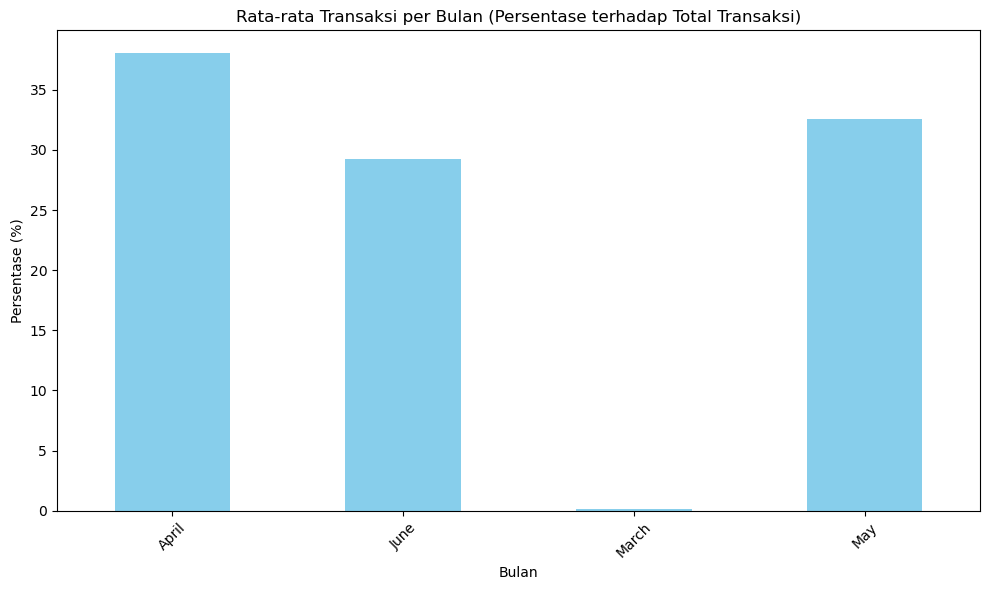

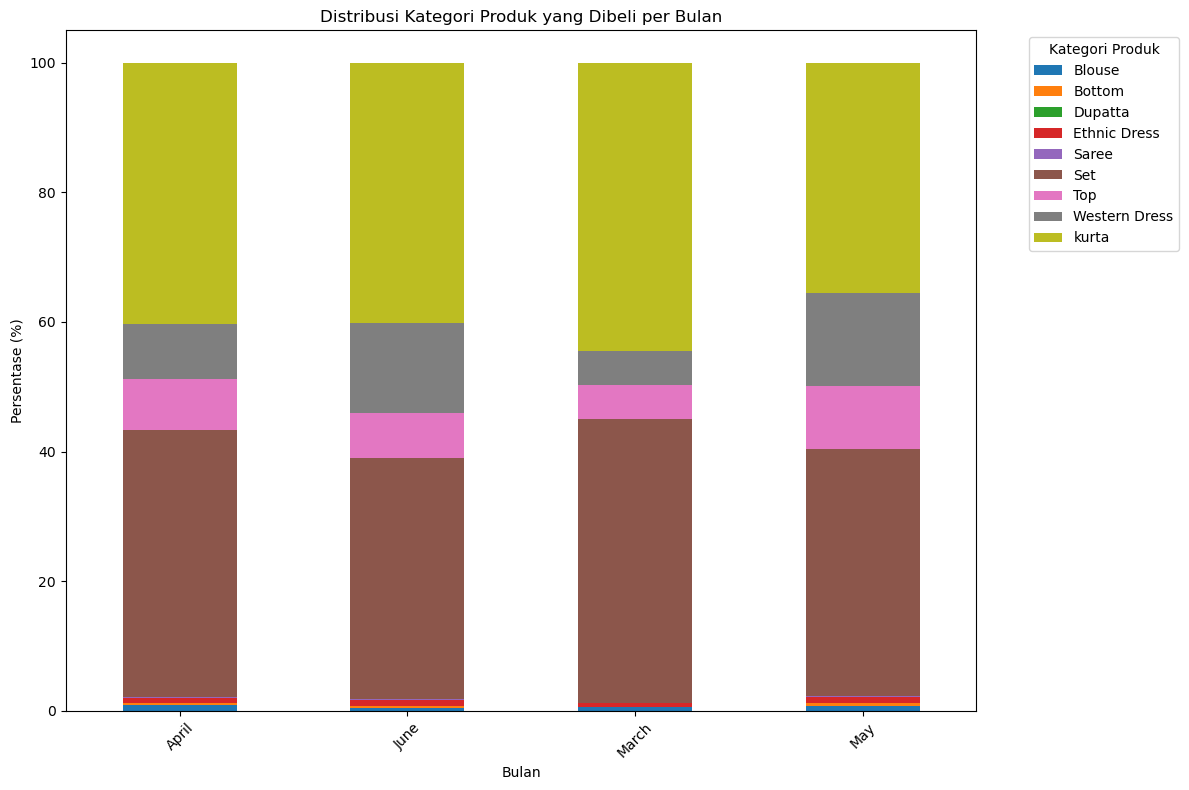

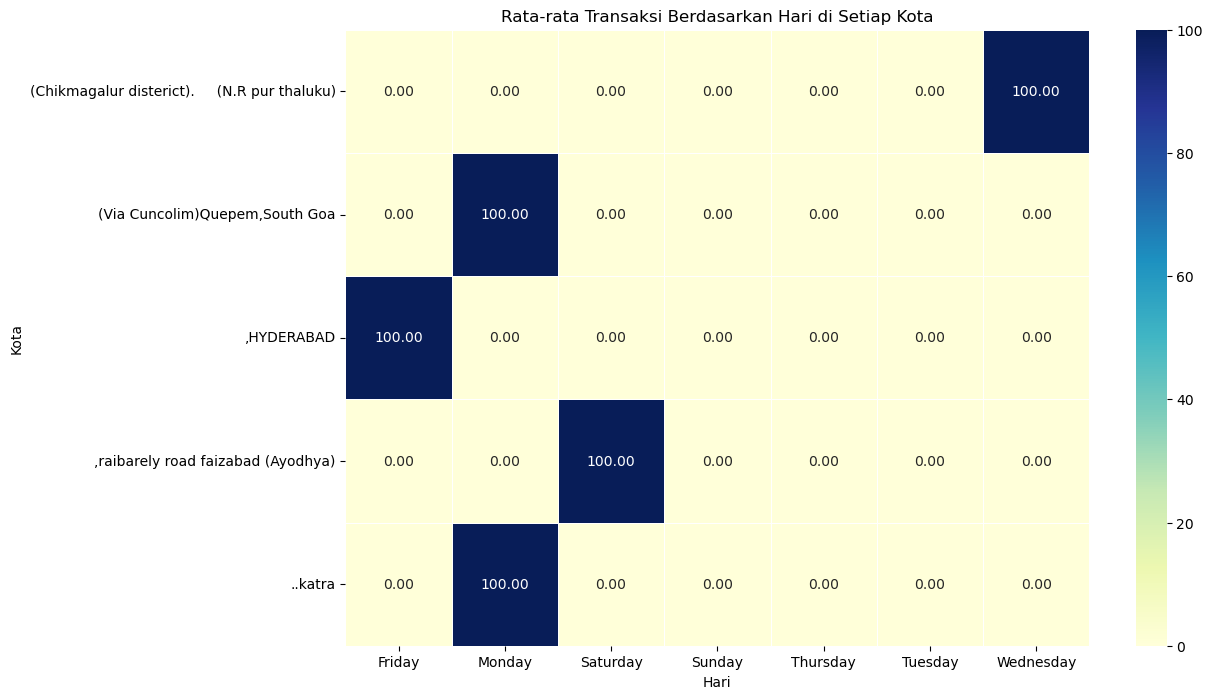

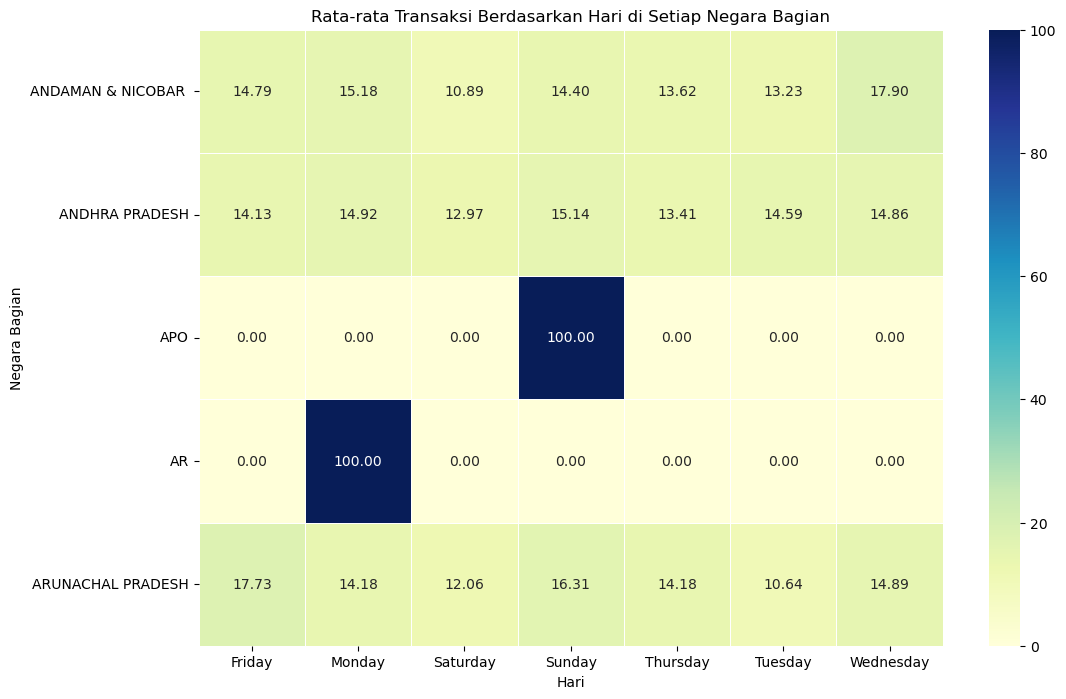

In [28]:
# 1. Visualisasi rata-rata transaksi per bulan
monthly_sales_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Rata-rata Transaksi per Bulan (Persentase terhadap Total Transaksi)")
plt.xlabel("Bulan")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Visualisasi distribusi kategori produk per bulan (Stacked Bar)
category_monthly_avg_percentage.head(5).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Distribusi Kategori Produk yang Dibeli per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45)
plt.legend(title="Kategori Produk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Heatmap rata-rata transaksi berdasarkan hari di setiap kota
plt.figure(figsize=(12, 8))
sns.heatmap(city_day_avg_percentage.head(5), cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Rata-rata Transaksi Berdasarkan Hari di Setiap Kota")
plt.xlabel("Hari")
plt.ylabel("Kota")
plt.show()

# 4. Heatmap rata-rata transaksi berdasarkan hari di setiap negara bagian
plt.figure(figsize=(12, 8))
sns.heatmap(state_day_avg_percentage.head(5), cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Rata-rata Transaksi Berdasarkan Hari di Setiap Negara Bagian")
plt.xlabel("Hari")
plt.ylabel("Negara Bagian")
plt.show()


In [24]:
print(data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'day', 'Month'],
      dtype='object')


In [25]:
# Menghitung jumlah pembelian per 'Order ID'
order_counts = data['Order ID'].value_counts()

# Menambahkan kolom 'Buy_Again' yang menunjukkan apakah ID membeli lebih dari sekali
data['Buy_Again'] = data['Order ID'].map(order_counts) > 1

# Mengonversi menjadi 1 jika melakukan pembelian berulang, dan 0 jika tidak
data['Buy_Again'] = data['Buy_Again'].astype(int)

# Menghitung jumlah ID yang melakukan pembelian berulang (Buy_Again == 1)
buy_again_count = data[data['Buy_Again'] == 1]['Order ID'].nunique()

# Menghitung jumlah ID yang tidak melakukan pembelian berulang (Buy_Again == 0)
no_buy_again_count = data[data['Buy_Again'] == 0]['Order ID'].nunique()

# Menampilkan jumlah pembelian ulang dan tidak ulang
print(f"Jumlah ID yang melakukan pembelian berulang: {buy_again_count}")
print(f"Jumlah ID yang tidak melakukan pembelian berulang: {no_buy_again_count}")


Jumlah ID yang melakukan pembelian berulang: 6846
Jumlah ID yang tidak melakukan pembelian berulang: 113532


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Misalkan X dan y adalah data yang telah dipisahkan (fitur dan target)
X = data.drop(columns=['Buy_Again'])  # Fitur
y = data['Buy_Again']  # Target

# 1. Mengecek kolom bertipe datetime
datetime_columns = X.select_dtypes(include=['datetime']).columns.tolist()

# Menampilkan kolom datetime jika ada
print(f"Kolom dengan tipe datetime: {datetime_columns}")

# 2. Menghapus kolom bertipe datetime (Jika tidak relevan)
X = X.drop(columns=datetime_columns)

# 3. Pastikan hanya kolom numerik yang ada di X yang akan dinormalisasi
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()

# Verifikasi kolom numerik setelah pembersihan
print(f"Kolom numerik setelah pembersihan: {numeric_columns}")

# 4. Melakukan encoding untuk kolom kategorikal
categorical_columns = X.select_dtypes(exclude=['number']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# 5. Menangani missing values pada data numerik
imputer = SimpleImputer(strategy='mean')  # Anda bisa memilih strategi lain seperti median atau mode
X[numeric_columns] = imputer.fit_transform(X[numeric_columns])

# 6. Menormalisasi data numerik setelah encoding
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# 7. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Menerapkan SMOTE pada data latih untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print("\nDistribusi kelas di data latih setelah SMOTE:")
print(pd.Series(y_res).value_counts())

# 9. Pelatihan model regresi logistik
model = LogisticRegression(class_weight='balanced', max_iter=2000, penalty='l2', C=0.1)
model.fit(X_res, y_res)

# 10. Evaluasi model pada data uji
y_pred = model.predict(X_test)

# 11. Menampilkan hasil evaluasi
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Kolom dengan tipe datetime: ['Date']
Kolom numerik setelah pembersihan: ['index', 'Qty', 'Amount', 'ship-postal-code']

Distribusi kelas di data latih setelah SMOTE:
Buy_Again
0    79476
1    79476
Name: count, dtype: int64

Akurasi Model: 0.62

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75     34056
           1       0.13      0.39      0.20      4637

    accuracy                           0.62     38693
   macro avg       0.51      0.52      0.48     38693
weighted avg       0.80      0.62      0.69     38693



C:\Users\aryag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Gunakan RandomForest
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_res, y_res)
y_pred_rf = model_rf.predict(X_test)
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Atau coba XGBoost
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_res, y_res)
y_pred_xgb = model_xgb.predict(X_test)
print("Akurasi XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Akurasi Random Forest: 0.8978109735611093
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     34056
           1       0.71      0.25      0.37      4637

    accuracy                           0.90     38693
   macro avg       0.81      0.62      0.66     38693
weighted avg       0.88      0.90      0.88     38693

Akurasi XGBoost: 0.876515131936009
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     34056
           1       0.45      0.13      0.20      4637

    accuracy                           0.88     38693
   macro avg       0.67      0.55      0.57     38693
weighted avg       0.84      0.88      0.85     38693




=== Logistic Regression ===
Akurasi Model: 0.62

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75     34056
           1       0.13      0.39      0.20      4637

    accuracy                           0.62     38693
   macro avg       0.51      0.52      0.48     38693
weighted avg       0.80      0.62      0.69     38693



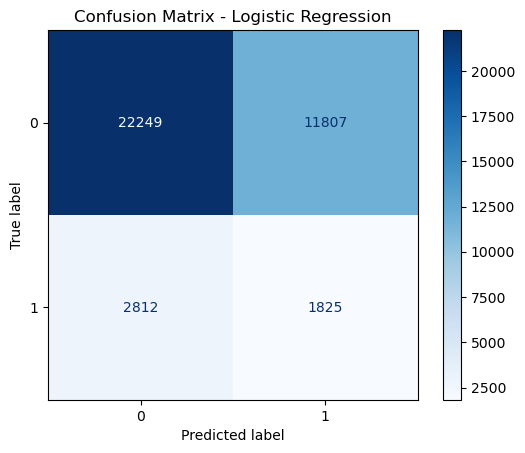

ROC-AUC Logistic Regression: 0.53


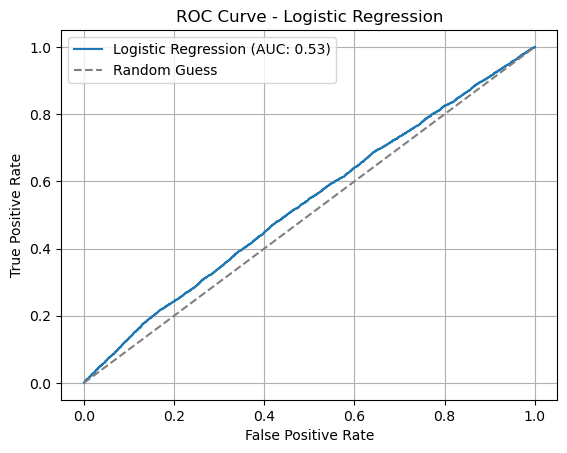

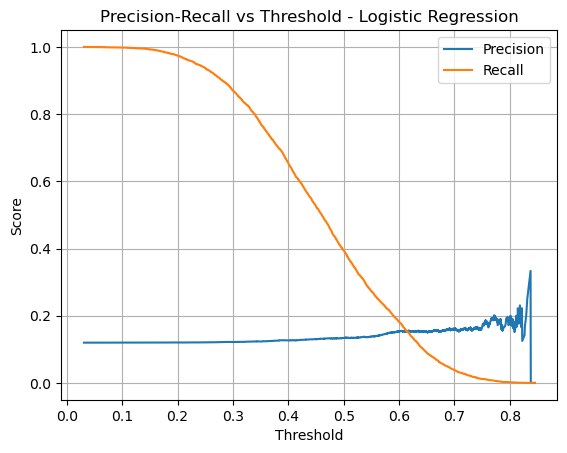

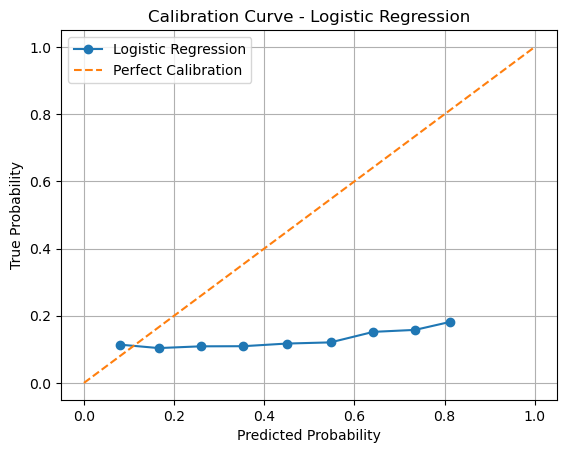


=== Random Forest ===
Akurasi Model: 0.90

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     34056
           1       0.71      0.25      0.37      4637

    accuracy                           0.90     38693
   macro avg       0.81      0.62      0.66     38693
weighted avg       0.88      0.90      0.88     38693



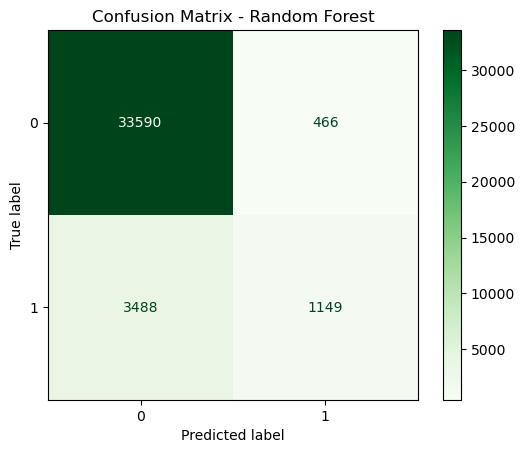

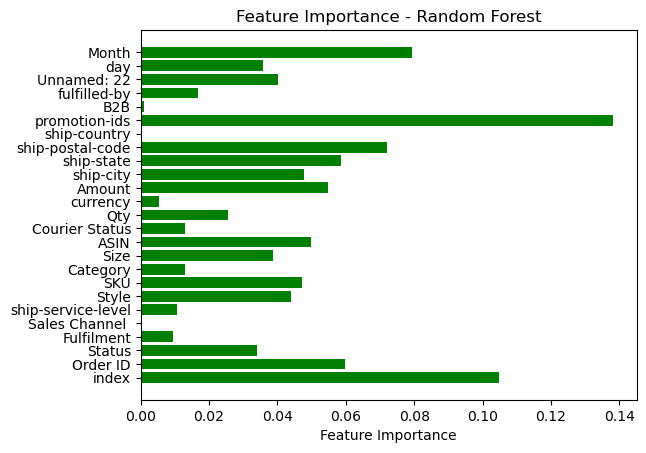


=== XGBoost ===
Akurasi Model: 0.88

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     34056
           1       0.45      0.13      0.20      4637

    accuracy                           0.88     38693
   macro avg       0.67      0.55      0.57     38693
weighted avg       0.84      0.88      0.85     38693



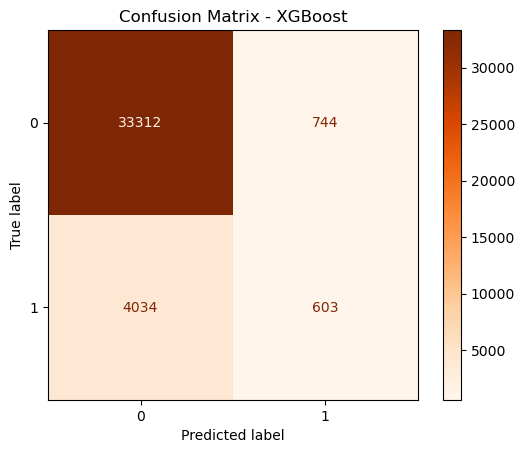

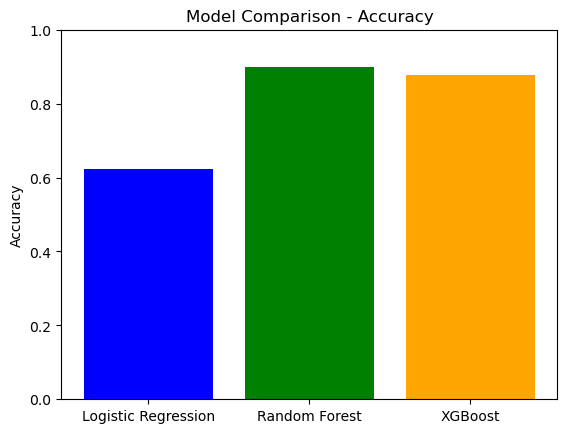

In [52]:
# Import library
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    accuracy_score,
)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# ===== Evaluasi Logistic Regression =====
print("\n=== Logistic Regression ===")

# Akurasi Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {logistic_accuracy:.2f}")

# Laporan klasifikasi Logistic Regression
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=model.classes_)
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC-AUC Logistic Regression (untuk klasifikasi biner)
if len(y_test.unique()) == 2:
    y_proba = model.predict_proba(X_test)[:, 1]
    logistic_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Logistic Regression: {logistic_auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Logistic Regression (AUC: {logistic_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Logistic Regression")
    plt.legend()
    plt.grid()
    plt.show()

    # Precision-Recall vs Threshold
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs Threshold - Logistic Regression")
    plt.legend()
    plt.grid()
    plt.show()

    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker="o", label="Logistic Regression")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Probability")
    plt.title("Calibration Curve - Logistic Regression")
    plt.legend()
    plt.grid()
    plt.show()

# ===== Evaluasi Random Forest =====
print("\n=== Random Forest ===")

# Akurasi Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model: {rf_accuracy:.2f}")

# Laporan klasifikasi Random Forest
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance Random Forest
rf_importances = model_rf.feature_importances_
features = X.columns
plt.barh(features, rf_importances, color="green")
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

# ===== Evaluasi XGBoost =====
print("\n=== XGBoost ===")

# Akurasi XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi Model: {xgb_accuracy:.2f}")

# Laporan klasifikasi XGBoost
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ===== Perbandingan Akurasi Model =====
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracies = [logistic_accuracy, rf_accuracy, xgb_accuracy]

plt.bar(models, accuracies, color=["blue", "green", "orange"])
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)
plt.show()


  1. Logistic Regression
Akurasi: 59%
Precision untuk kelas 1 (pelanggan yang membeli kembali): 13%
Recall untuk kelas 1: 41%

Interpretasi:
*   Logistic Regression memiliki performa yang buruk untuk mendeteksi pelanggan yang akan membeli kembali (kelas 1).
*   Precision yang rendah menunjukkan bahwa banyak prediksi untuk pelanggan yang akan membeli kembali (kelas 1) sebenarnya salah.
*   Recall yang moderat (41%) menunjukkan model cukup baik menangkap sebagian pelanggan yang akan membeli kembali, tetapi tidak konsisten.

2. Random Forest
Akurasi: 90%
Precision untuk kelas 1: 71%
Recall untuk kelas 1: 25%

Interpretasi:
*   Random Forest menunjukkan performa keseluruhan yang jauh lebih baik dibanding Logistic Regression, terutama dengan precision yang cukup tinggi untuk kelas 1 (71%).
*   Namun, recall yang rendah (25%) menunjukkan bahwa banyak pelanggan yang akan membeli kembali tidak terdeteksi oleh model.
*   Akurasi tinggi cenderung dipengaruhi oleh ketepatan model dalam memprediksi pelanggan yang tidak membeli kembali (kelas 0), mengingat data tidak seimbang.

3. XGBoost
Akurasi: 88%
Precision untuk kelas 1: 45%
Recall untuk kelas 1: 13%

Interpretasi:
*   XGBoost memberikan performa yang lebih buruk dibanding Random Forest untuk mendeteksi pelanggan yang membeli kembali.
*   Precision dan recall rendah untuk kelas 1 menunjukkan bahwa model ini kurang efektif untuk tujuan identifikasi pelanggan yang akan membeli kembali.

Kesimpulan Utama
*   Random Forest adalah model terbaik untuk kasus ini karena precision untuk kelas 1 lebih tinggi dibanding model lainnya (71%). Namun, recall rendah (25%) menunjukkan model ini gagal mendeteksi sebagian besar pelanggan yang membeli kembali.
*   Masalah utama: Data tidak seimbang antara kelas 0 (tidak membeli kembali) dan kelas 1 (membeli kembali), yang menyebabkan model lebih condong memprediksi kelas mayoritas (kelas 0).



Jika tujuan utama adalah retensi pelanggan, maka lebih baik fokus pada recall kelas 1 agar sebanyak mungkin pelanggan yang berpotensi membeli kembali dapat terdeteksi. Meski precision menurun, perusahaan dapat mengambil tindakan proaktif seperti menawarkan diskon atau kampanye khusus untuk pelanggan-pelanggan yang terdeteksi oleh model.

In [58]:
!pip list


Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.12.3
aiofiles                      22.1.0
aiohappyeyeballs              2.4.4
aiohttp                       3.11.10
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.16
altair                        5.5.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   3.2.2
argon2-cffi                   21.3.0
a

In [60]:
!pip list > library_versions.txt
